## 第58课 使用Word Embedding+Keras进行自然语言处理NLP

### Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

### Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


Word embedding is any of a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. 

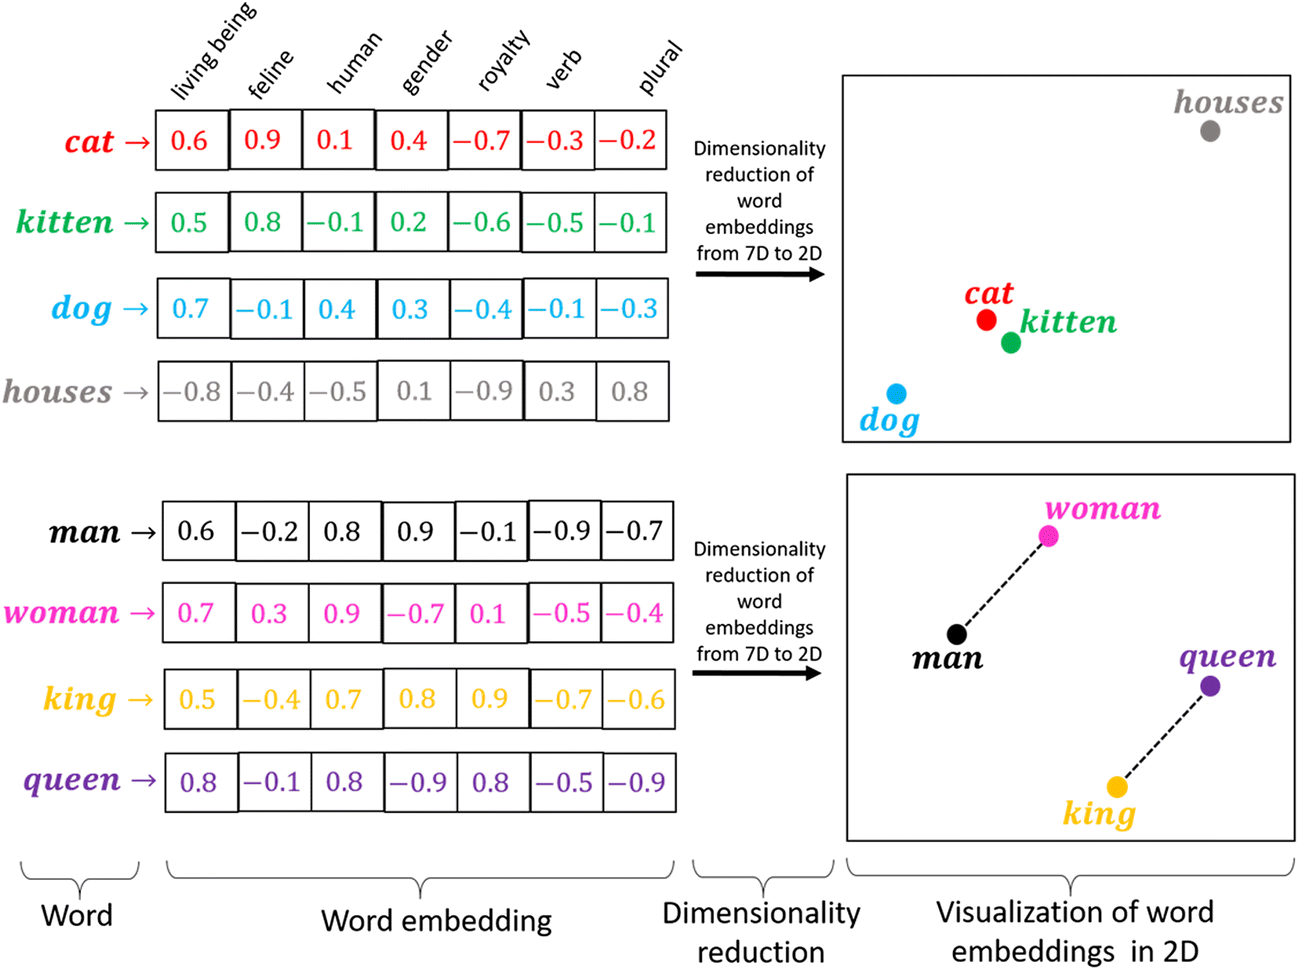

In [1]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson58-10.png')

#One hot encoding is a technique which converts categorical variables to numerical in an interpretable format

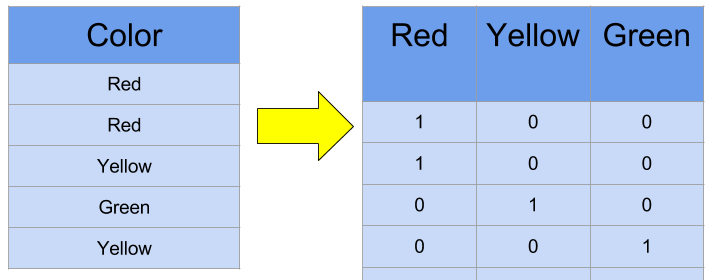

In [56]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson58-9.png')

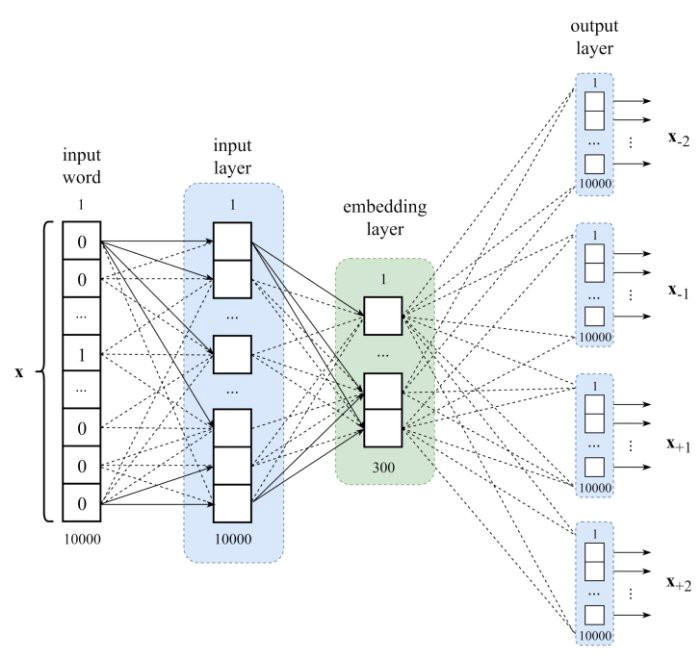

In [57]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson58-11.jpeg')

In [21]:
##tensorflow >2.0
from tensorflow.keras.preprocessing.text import one_hot

In [22]:
### sentences
sentences=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [23]:
sentences

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [24]:
### Vocabulary size
voc_size=10000

In [25]:
onehot_repr=[one_hot(words,voc_size) for words in sentences] 
print(onehot_repr)

[[7444, 9747, 1072, 4315], [7444, 9747, 1072, 6383], [7444, 2756, 1072, 9171], [3231, 7864, 4340, 6689, 1836], [3231, 7864, 4340, 6689, 1204], [6676, 7444, 8480, 1072, 6685], [5553, 2303, 2094, 6689]]


In [8]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [9]:
import numpy as np

In [34]:
sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0 7444 9747 1072 4315]
 [   0    0    0    0 7444 9747 1072 6383]
 [   0    0    0    0 7444 2756 1072 9171]
 [   0    0    0 3231 7864 4340 6689 1836]
 [   0    0    0 3231 7864 4340 6689 1204]
 [   0    0    0 6676 7444 8480 1072 6685]
 [   0    0    0    0 5553 2303 2094 6689]]


In [35]:
dim=10

In [36]:
model=Sequential()
model.add(Embedding(voc_size,dim,input_length=sent_length))
model.compile('adam','mse')

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 8, 10)             100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [38]:
print(model.predict(embedded_docs))

[[[ 0.03371892  0.00638957 -0.04220005 -0.01127896 -0.02504551
    0.03564302  0.03427379 -0.04830183 -0.01927092  0.01685169]
  [ 0.03371892  0.00638957 -0.04220005 -0.01127896 -0.02504551
    0.03564302  0.03427379 -0.04830183 -0.01927092  0.01685169]
  [ 0.03371892  0.00638957 -0.04220005 -0.01127896 -0.02504551
    0.03564302  0.03427379 -0.04830183 -0.01927092  0.01685169]
  [ 0.03371892  0.00638957 -0.04220005 -0.01127896 -0.02504551
    0.03564302  0.03427379 -0.04830183 -0.01927092  0.01685169]
  [ 0.02124229 -0.01544081  0.01212829 -0.03118124  0.04952425
    0.0239237   0.01476313  0.039154   -0.02689306  0.00499315]
  [-0.02972599  0.00503121 -0.04325895 -0.01655204  0.00636152
    0.01479758  0.02953314 -0.02923408  0.04960949 -0.01557208]
  [-0.02451264  0.03189581 -0.04258013  0.03368305  0.00468358
   -0.03228253 -0.01121975  0.01135421  0.00788815 -0.03467575]
  [-0.03293091 -0.02042204 -0.04004549  0.04415143 -0.04041867
    0.01367344  0.0084867   0.01831343  0.026790

In [39]:
embedded_docs[0]

array([   0,    0,    0,    0, 7444, 9747, 1072, 4315])

In [40]:
print(model.predict(embedded_docs)[0])

[[ 0.03371892  0.00638957 -0.04220005 -0.01127896 -0.02504551  0.03564302
   0.03427379 -0.04830183 -0.01927092  0.01685169]
 [ 0.03371892  0.00638957 -0.04220005 -0.01127896 -0.02504551  0.03564302
   0.03427379 -0.04830183 -0.01927092  0.01685169]
 [ 0.03371892  0.00638957 -0.04220005 -0.01127896 -0.02504551  0.03564302
   0.03427379 -0.04830183 -0.01927092  0.01685169]
 [ 0.03371892  0.00638957 -0.04220005 -0.01127896 -0.02504551  0.03564302
   0.03427379 -0.04830183 -0.01927092  0.01685169]
 [ 0.02124229 -0.01544081  0.01212829 -0.03118124  0.04952425  0.0239237
   0.01476313  0.039154   -0.02689306  0.00499315]
 [-0.02972599  0.00503121 -0.04325895 -0.01655204  0.00636152  0.01479758
   0.02953314 -0.02923408  0.04960949 -0.01557208]
 [-0.02451264  0.03189581 -0.04258013  0.03368305  0.00468358 -0.03228253
  -0.01121975  0.01135421  0.00788815 -0.03467575]
 [-0.03293091 -0.02042204 -0.04004549  0.04415143 -0.04041867  0.01367344
   0.0084867   0.01831343  0.02679076 -0.04338995]]


In [17]:
import tensorflow
print(tensorflow.__version__)

2.3.0


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Categorical data to be converted to numeric data
colors = (["yellow","blue","red", "green","red"])

### integer mapping using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(colors)
print(integer_encoded)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[3 0 2 1 2]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
